<a href="https://colab.research.google.com/github/LucasVD23/T2_AM1/blob/main/T2_AM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho 1 de AM1**

**Integrantes**

Lucas Vinícius Domingues 769699

Rafael Yoshio Yamawaki Murata 769681

Victor Luís Aguilar Antunes 769734

**Link para o Dataset utilizado: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records**

**Carregar o dataset no colab!**

**Atenção!**
Os Testes estão dividos de acordo com a seguinte hierarquia:    


*   2 Primeiras seções: Teste com todos os atributos/Testes com atributos do artigo
*   Dentro de cada seção existem duas subseções: Validação Externa e Validação Interna
*   Dentro de cada uma das subseções existem outras 3 subseções: Execução do DBSCAN, K-Means e Ward

Ao executar uma seção inteira são executados todos os testes dentro dela




# **Dados**
https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
data_heart= pd.read_csv ("/content/heart_failure_clinical_records_dataset.csv")
teste_classes = data_heart['DEATH_EVENT']


In [ ]:
data_heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# **EDA**

Atributos

*   Categóricos
  *   Nominais: diabetes, high_blood_pressure, sex, smoking, death event

   

*   Numéricos
  *   Discretos: age, creatinine_phosphokinase, ejection_fraction,serum_sodium,time
  *   Contínuos: platelets, serum_creatinine







### **Atributos Categóricos**

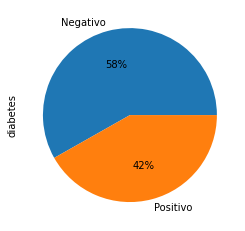

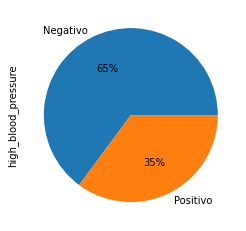

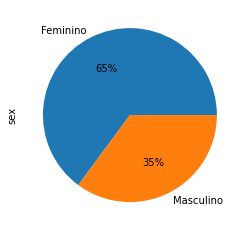

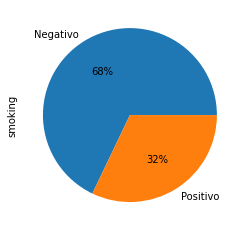

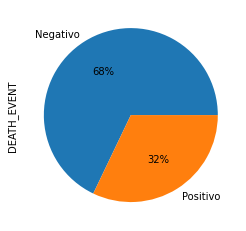

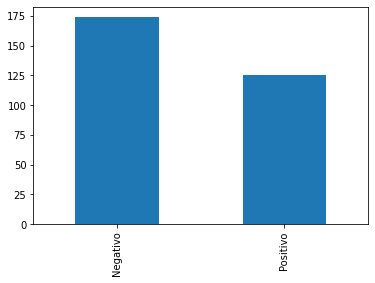

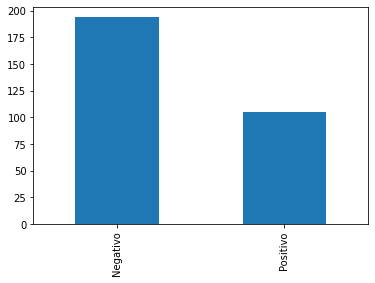

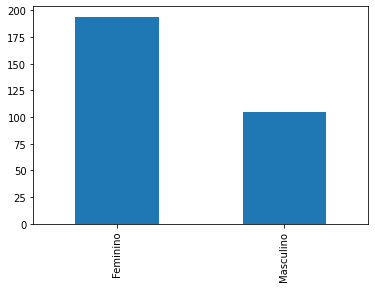

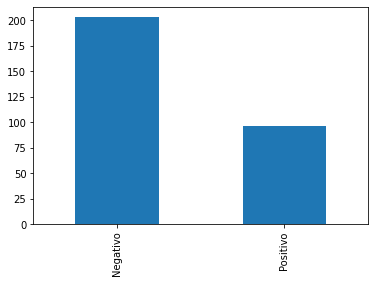

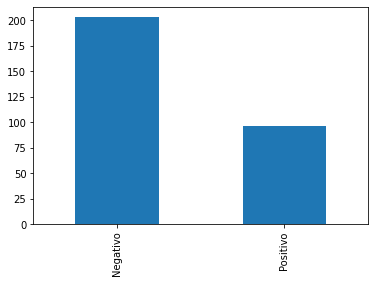

In [ ]:
#visualizando atributos categóricos
categoricos = ['diabetes', 'high_blood_pressure','sex','smoking','DEATH_EVENT']

for atributo in categoricos:
  if(atributo ==  'sex'):
    data_heart[atributo].value_counts().plot.pie(labels = ['Feminino','Masculino'], autopct='%1.0f%%')
  else:
    data_heart[atributo].value_counts().plot.pie(labels = ['Negativo','Positivo'], autopct='%1.0f%%')
  plt.show()

for atributo in categoricos:
    if(atributo ==  'sex'):
      data_heart[atributo].value_counts().plot.bar().set_xticklabels(['Feminino','Masculino'])
    else:
      data_heart[atributo].value_counts().plot.bar().set_xticklabels(['Negativo','Positivo'])
    plt.show()


### **Atributos Numéricos**

ATRIBUTO: age
MIN: 40.0
MAX: 95.0
MÉDIA: 60.83389297658862
DESV PADRÃO: 11.894809074044478


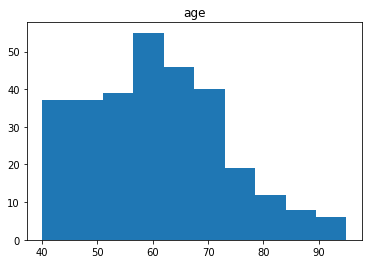

ATRIBUTO: creatinine_phosphokinase
MIN: 23
MAX: 7861
MÉDIA: 581.8394648829432
DESV PADRÃO: 970.2878807124363


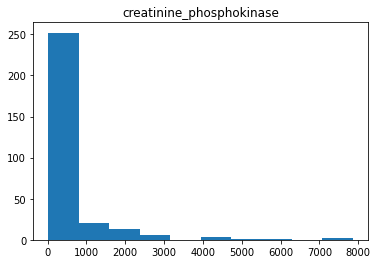

ATRIBUTO: ejection_fraction
MIN: 14
MAX: 80
MÉDIA: 38.08361204013378
DESV PADRÃO: 11.834840741039173


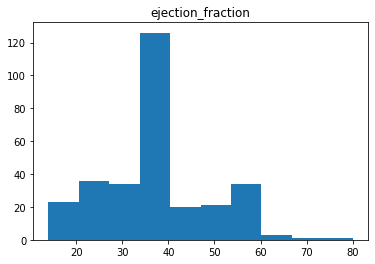

ATRIBUTO: serum_sodium
MIN: 113
MAX: 148
MÉDIA: 136.62541806020067
DESV PADRÃO: 4.412477283909233


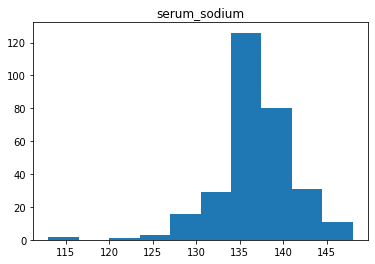

ATRIBUTO: time
MIN: 4
MAX: 285
MÉDIA: 130.2608695652174
DESV PADRÃO: 77.61420795029342


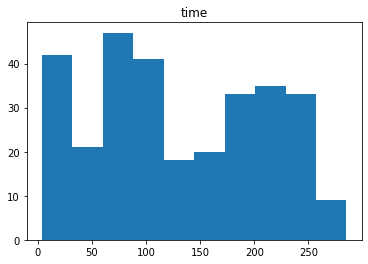

ATRIBUTO: age
MIN: 40.0
MAX: 95.0
MÉDIA: 60.83389297658862
DESV PADRÃO: 11.894809074044478


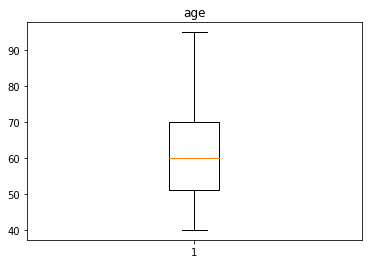

ATRIBUTO: creatinine_phosphokinase
MIN: 23
MAX: 7861
MÉDIA: 581.8394648829432
DESV PADRÃO: 970.2878807124363


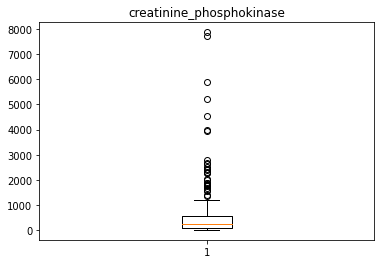

ATRIBUTO: ejection_fraction
MIN: 14
MAX: 80
MÉDIA: 38.08361204013378
DESV PADRÃO: 11.834840741039173


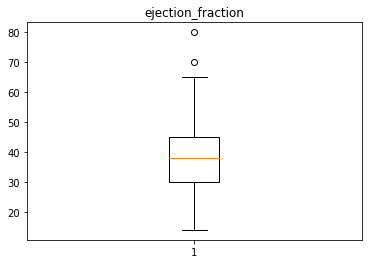

ATRIBUTO: serum_sodium
MIN: 113
MAX: 148
MÉDIA: 136.62541806020067
DESV PADRÃO: 4.412477283909233


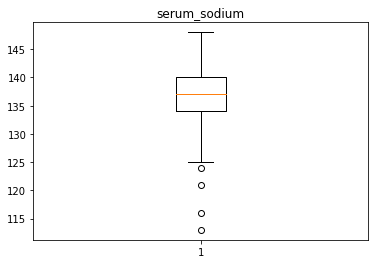

ATRIBUTO: time
MIN: 4
MAX: 285
MÉDIA: 130.2608695652174
DESV PADRÃO: 77.61420795029342


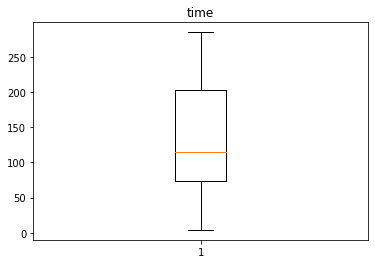

ATRIBUTO: platelets
MIN: 25100.0
MAX: 850000.0
MÉDIA: 263358.02926421416
DESV PADRÃO: 97804.23686859828


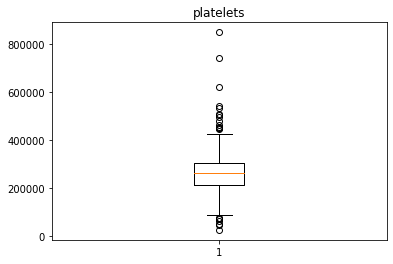

ATRIBUTO: serum_creatinine
MIN: 0.5
MAX: 9.4
MÉDIA: 1.393879598662207
DESV PADRÃO: 1.034510064089853


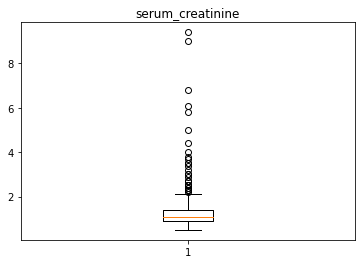

In [ ]:
#atributos numéricos discretos:
discretos = ['age', 'creatinine_phosphokinase', 'ejection_fraction','serum_sodium','time']
continuos = ['platelets', 'serum_creatinine']
for atributo in discretos:
  print("ATRIBUTO: " + atributo)
  print("MIN: " + str(data_heart[atributo].min()))
  print("MAX: " + str(data_heart[atributo].max()))
  print("MÉDIA: " + str(data_heart[atributo].mean()))
  print("DESV PADRÃO: "+ str(data_heart[atributo].std()))
  plt.hist(data_heart[atributo])
  plt.title(atributo)
  plt.show()

for atributo in (discretos+continuos):
  print("ATRIBUTO: " + atributo)
  print("MIN: " + str(data_heart[atributo].min()))
  print("MAX: " + str(data_heart[atributo].max()))
  print("MÉDIA: " + str(data_heart[atributo].mean()))
  print("DESV PADRÃO: "+ str(data_heart[atributo].std()))
  plt.boxplot(data_heart[atributo])
  plt.title(atributo)
  plt.show()

ATRIBUTO: age
MIN: 40.0
MAX: 95.0
MÉDIA: 60.83389297658862
DESV PADRÃO: 11.894809074044478


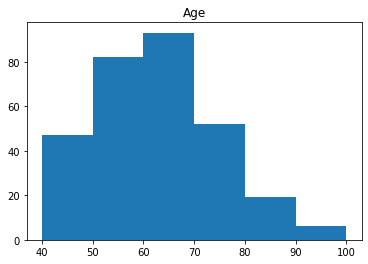

In [ ]:
  print("ATRIBUTO: age")
  print("MIN: " + str(data_heart['age'].min()))
  print("MAX: " + str(data_heart['age'].max()))
  print("MÉDIA: " + str(data_heart['age'].mean()))
  print("DESV PADRÃO: "+ str(data_heart['age'].std()))
  plt.hist(data_heart['age'],bins=[40,50,60,70,80,90,100])
  plt.title('Age')
  plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

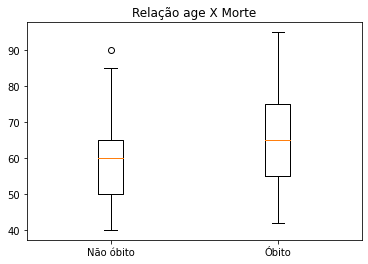

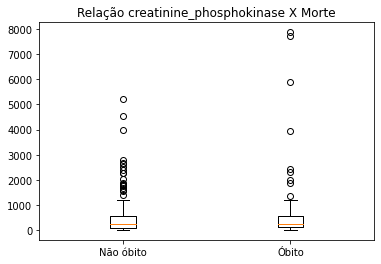

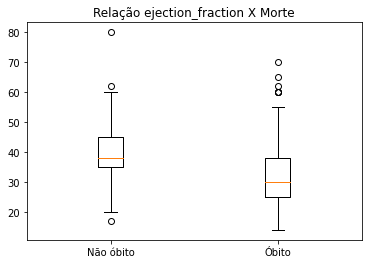

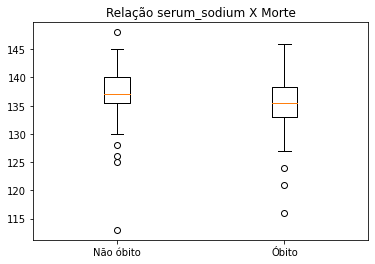

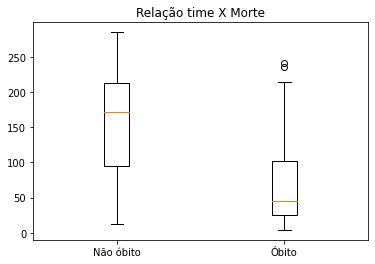

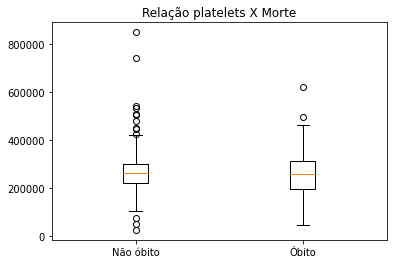

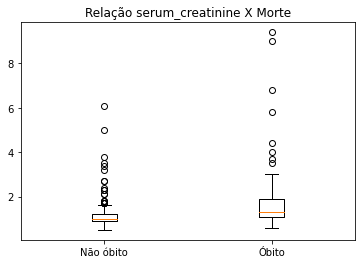

In [ ]:
for coluna in (discretos+continuos):
    my_dict = {'Não óbito': data_heart[data_heart['DEATH_EVENT'] == 0][coluna], 
               'Óbito': data_heart[data_heart['DEATH_EVENT'] == 1][coluna]}
    
    fig, ax = plt.subplots()
    ax.boxplot(my_dict.values())
    ax.set_xticklabels(my_dict.keys())
    plt.title('Relação ' + coluna + ' X Morte')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Relação tabagismo ')

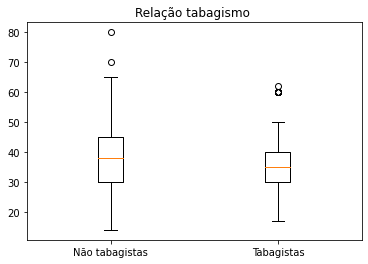

In [ ]:
    my_dict = {'Não tabagistas': data_heart[data_heart['smoking'] == 0]['ejection_fraction'], 
               'Tabagistas': data_heart[data_heart['smoking'] == 1]['ejection_fraction']}
    
    fig, ax = plt.subplots()
    ax.boxplot(my_dict.values())
    ax.set_xticklabels(my_dict.keys())
    plt.title('Relação tabagismo ')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Relação Hipertensão X Sódio Sérico ')

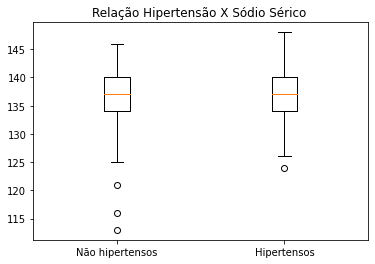

In [ ]:
    my_dict = {'Não hipertensos': data_heart[data_heart['high_blood_pressure'] == 0]['serum_sodium'], 
               'Hipertensos': data_heart[data_heart['high_blood_pressure'] == 1]['serum_sodium']}
    
    fig, ax = plt.subplots()
    ax.boxplot(my_dict.values())
    ax.set_xticklabels(my_dict.keys())
    plt.title('Relação Hipertensão X Sódio Sérico ')

# **Testes - Todos Atributos**


## Validação Externa (Grupos: Ocorrência de Óbito e Não Ocorrência de Óbito) 

In [ ]:
data_heart= pd.read_csv ("/content/heart_failure_clinical_records_dataset.csv")
teste_classes = data_heart['DEATH_EVENT']
data_heart= data_heart.drop(columns=['DEATH_EVENT'])

In [ ]:
data_heart = data_heart.iloc[:,0:12].values

In [ ]:
normalizador = MinMaxScaler(feature_range = (0,1))
data_heart = normalizador.fit_transform(data_heart)

### DBSCAN

In [ ]:
params = {'eps' : np.arange(0.1,1.5,0.05),
        'min_samples' : np.arange(2,30,1)}


In [ ]:
max_ari = -100
for i in params['eps']:
  for j in params['min_samples']:
    clustering = DBSCAN(eps=i, min_samples=j).fit(data_heart)
    labels = clustering.labels_
    if(len(np.unique(labels))>1):
      ari = metrics.adjusted_rand_score(np.array(teste_classes),labels)
      if(ari> max_ari):
        best = (clustering,[i,j],len(np.unique(labels)),ari)
        max_ari = ari

In [ ]:
best

(DBSCAN(eps=1.0500000000000003, min_samples=24),
 [1.0500000000000003, 24],
 2,
 0.058094017314784245)

In [ ]:
best[0].fit(data_heart)
labels = best[0].labels_
print("ARI: " + str(metrics.adjusted_rand_score(np.array(teste_classes),labels)))

ARI: 0.058094017314784245


### K-means


1 411.29162529254427
2 329.77040896747997
3 286.3731234272049
4 249.85601191101298
5 227.76237137788223
6 207.80405387855018
7 189.70035148711116
8 174.5990336027736
9 162.93923887181077
10 148.08794371686423
11 140.35516854187102
12 126.9664651115429
13 119.52552568409823
14 111.6017823704477
15 104.77111768057915
16 97.13977117839741
17 90.68341549511132
18 84.03753940143923
19 79.72417155246055


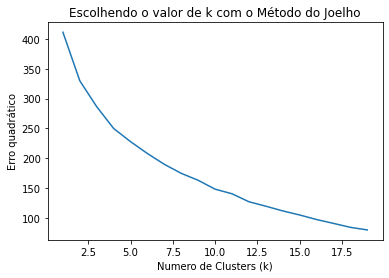

In [ ]:
v = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(data_heart)
    print(i, kmeans.inertia_)
    v.append(kmeans.inertia_)
plt.plot(range(1, 20), v)
plt.title('Escolhendo o valor de k com o Método do Joelho')
plt.xlabel('Numero de Clusters (k)')
plt.ylabel('Erro quadrático')
plt.show()

In [ ]:
media_ari = 0
for i in range(0,5):
  kmeans = KMeans(n_clusters =4, init = 'k-means++')
  kmeans.fit(data_heart)
  labels = kmeans.labels_
  media_ari += metrics.adjusted_rand_score(np.array(teste_classes),labels)
media_ari = media_ari/5

In [ ]:
print("MEDIA ARI: "+ str(media_ari))

MEDIA ARI: 0.0021412285613614246


### WARD

Text(0, 0.5, 'Distância Euclidiana')

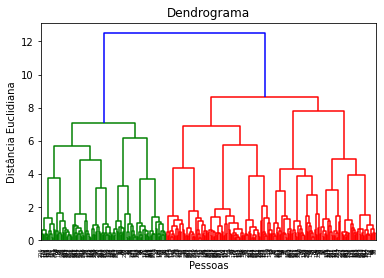

In [ ]:
dendrograma = dendrogram(linkage(data_heart, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')

In [ ]:
hc = AgglomerativeClustering(n_clusters =2, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(data_heart)

In [ ]:
print('ARI: ' +str(adjusted_rand_score(np.array(teste_classes),previsoes)))

ARI: -0.0068352880054680255


## Validação Interna - Tentando encontrar outros subgrupos

In [ ]:
data_heart= pd.read_csv ("/content/heart_failure_clinical_records_dataset.csv")
data_heart = data_heart.iloc[:,0:13].values

In [ ]:
normalizador = MinMaxScaler(feature_range = (0,1))
data_heart = normalizador.fit_transform(data_heart)

### DBSCAN

In [ ]:
params = {'eps' : np.arange(0.1,1.5,0.05),
        'min_samples' : np.arange(2,30,1)}


In [ ]:
max_silhueta = -100
for i in params['eps']:
  for j in params['min_samples']:
    clustering = DBSCAN(eps=i, min_samples=j).fit(data_heart)
    labels = clustering.labels_
    if(len(np.unique(labels))>1):
      silhueta = metrics.silhouette_score(data_heart,labels,metric='euclidean')
      if(silhueta > max_silhueta):
        best = (clustering,[i,j],len(np.unique(labels)),silhueta)
        max_silhueta = silhueta

In [ ]:
best

(DBSCAN(eps=0.8500000000000002, min_samples=2),
 [0.8500000000000002, 2],
 47,
 0.47859095650602035)

In [ ]:
best[0].fit(data_heart)
labels = best[0].labels_
print("Silhueta: " + str(metrics.silhouette_score(data_heart,labels)))

Silhueta: 0.47859095650602035


### K-means


1 476.4688828176279
2 391.7933886579311
3 342.4547121627114
4 311.00861906278726
5 286.00471805264374
6 267.5256731054354
7 252.14413481037306
8 233.7455958461129
9 221.376873022023
10 214.1115876499013
11 201.54327721068222
12 191.8572013170243
13 184.52610039536594
14 173.8058056510408
15 163.31584163295082
16 159.344948591299
17 152.32099394460255
18 145.4381582155811
19 140.01478318815705


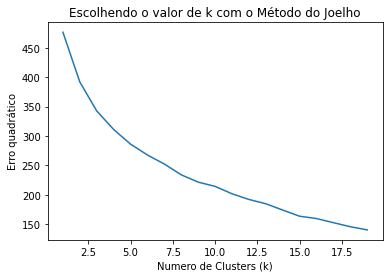

In [ ]:
v = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(data_heart)
    print(i, kmeans.inertia_)
    v.append(kmeans.inertia_)
plt.plot(range(1, 20), v)
plt.title('Escolhendo o valor de k com o Método do Joelho')
plt.xlabel('Numero de Clusters (k)')
plt.ylabel('Erro quadrático')
plt.show()

In [ ]:
media_silhueta = 0
for i in range(0,5):
  kmeans = KMeans(n_clusters =3, init = 'k-means++')
  kmeans.fit(data_heart)
  labels = kmeans.labels_
  media_silhueta += metrics.silhouette_score(data_heart,labels)
media_silhueta = media_silhueta/5

In [ ]:
print("Silhueta: " +str(media_silhueta))

Silhueta: 0.1798010710658692


### WARD

Text(0, 0.5, 'Distância Euclidiana')

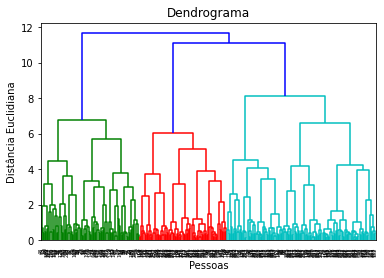

In [ ]:
dendrograma = dendrogram(linkage(data_heart, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')

In [ ]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(data_heart)

In [ ]:
print('Silhueta: ' + str(metrics.silhouette_score(data_heart,previsoes)))

Silhueta: 0.1745692761732073


# **Testes - Atributos do Artigo**

## Validação Externa (Ocorrência ou não ocorrência de óbito)

In [ ]:
data_heart= pd.read_csv ("/content/heart_failure_clinical_records_dataset.csv")
data_heart= data_heart.drop(columns=['time','serum_sodium','age', 'anaemia', 'creatinine_phosphokinase','high_blood_pressure' ,'platelets','diabetes','sex','smoking','DEATH_EVENT'])
data_heart = data_heart.iloc[:,0:3].values

In [ ]:
normalizador = MinMaxScaler(feature_range = (0,1))
data_heart = normalizador.fit_transform(data_heart)

### DBSCAN

In [ ]:
params = {'eps' : np.arange(0.1,1.5,0.05),
        'min_samples' : np.arange(2,30,1)}


In [ ]:
max_silhueta = -100
for i in params['eps']:
  for j in params['min_samples']:
    clustering = DBSCAN(eps=i, min_samples=j).fit(data_heart)
    labels = clustering.labels_
    if(len(np.unique(labels))>1):
      silhueta = metrics.adjusted_rand_score(np.array(teste_classes),labels)
      if(silhueta > max_silhueta):
        best = (clustering,[i,j],len(np.unique(labels)),silhueta)
        max_silhueta = silhueta

In [ ]:
best

(DBSCAN(eps=0.1, min_samples=29), [0.1, 29], 2, 0.06383011924802276)

In [ ]:
best[0].fit(data_heart)
labels = best[0].labels_
print("ARI: " + str(metrics.adjusted_rand_score(np.array(teste_classes),labels)))

ARI: 0.06383011924802276


### K-means


1 13.608231110616885
2 7.3158408357490075
3 5.075938107650702
4 3.037822799196096
5 2.333646168180584
6 1.8721531985985789
7 1.5702706274038285
8 1.3414189118144744
9 1.2184568543719563
10 1.0603992929547985
11 0.968711350596192
12 0.8894184523963862
13 0.8113618517842769
14 0.7313135631846956
15 0.6172126918347163
16 0.5796562882750864
17 0.4848265883933197
18 0.45810747822223097
19 0.3883852711779381


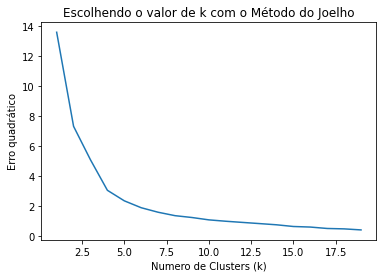

In [ ]:
v = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(data_heart)
    print(i, kmeans.inertia_)
    v.append(kmeans.inertia_)
plt.plot(range(1, 20), v)
plt.title('Escolhendo o valor de k com o Método do Joelho')
plt.xlabel('Numero de Clusters (k)')
plt.ylabel('Erro quadrático')
plt.show()

In [ ]:
media_ari = 0
for i in range(0,5):
  kmeans = KMeans(n_clusters = 4, init = 'k-means++')
  kmeans.fit(data_heart)
  labels = kmeans.labels_
  media_ari += metrics.adjusted_rand_score(np.array(teste_classes),labels)
media_ari = media_ari/5

In [ ]:
print("ARI: "+ str(metrics.adjusted_rand_score(np.array(teste_classes),labels)))

ARI: 0.08989691495344082


### WARD

Text(0, 0.5, 'Distância Euclidiana')

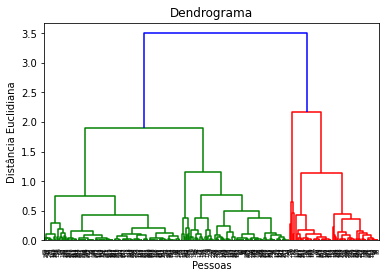

In [ ]:
dendrograma = dendrogram(linkage(data_heart, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(data_heart)

In [ ]:
print('ARI: ' +str(adjusted_rand_score(np.array(teste_classes),previsoes)))

ARI: -0.024796179227704437


## Validação Interna - Tentando encontrar outros subgrupos

In [ ]:
data_heart= pd.read_csv ("/content/heart_failure_clinical_records_dataset.csv")
data_heart= data_heart.drop(columns=['time','serum_sodium','age', 'anaemia', 'creatinine_phosphokinase','high_blood_pressure' ,'platelets','diabetes','sex','smoking','DEATH_EVENT'])
data_heart = data_heart.iloc[:,0:3].values

In [ ]:
normalizador = MinMaxScaler(feature_range = (0,1))
data_heart = normalizador.fit_transform(data_heart)

### DBSCAN

In [ ]:
params = {'eps' : np.arange(0.1,1.5,0.05),
        'min_samples' : np.arange(2,30,1)}


In [ ]:
max_silhueta = -100
for i in params['eps']:
  for j in params['min_samples']:
    clustering = DBSCAN(eps=i, min_samples=j).fit(data_heart)
    labels = clustering.labels_
    if(len(np.unique(labels))>1):
      silhueta = metrics.silhouette_score(data_heart,labels,metric='euclidean')
      if(silhueta > max_silhueta):
        best = (clustering,[i,j],len(np.unique(labels)),silhueta)
        max_silhueta = silhueta

In [ ]:
best

(DBSCAN(eps=0.45000000000000007, min_samples=6),
 [0.45000000000000007, 6],
 2,
 0.7497331088388867)

In [ ]:
best[0].fit(data_heart)
labels = best[0].labels_
print("Silhueta: " + str(metrics.silhouette_score(data_heart,labels)))

Silhueta: 0.7497331088388867


In [ ]:
print(np.unique(labels))

[-1  0]


### K-means


1 13.608231110616885
2 7.3158408357490075
3 5.075938107650702
4 3.037822799196096
5 2.354912890272418
6 1.8558339217296695
7 1.5710056320939096
8 1.3646271112595274
9 1.2265968467728587
10 1.1044638580873178
11 0.9753344125018921
12 0.8729194014705606
13 0.7876027490993791
14 0.6975888080990795
15 0.6279879069124786
16 0.5304667384457726
17 0.49505775531232543
18 0.44631174161915077
19 0.3876307205466619


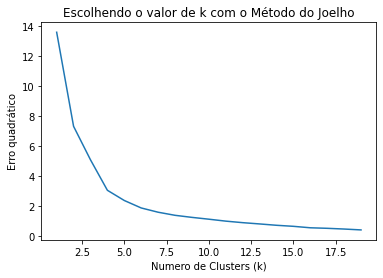

In [ ]:
v = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(data_heart)
    print(i, kmeans.inertia_)
    v.append(kmeans.inertia_)
plt.plot(range(1, 20), v)
plt.title('Escolhendo o valor de k com o Método do Joelho')
plt.xlabel('Numero de Clusters (k)')
plt.ylabel('Erro quadrático')
plt.show()

In [ ]:
media_silhueta = 0
for i in range(0,5):
  kmeans = KMeans(n_clusters = 4, init = 'k-means++')
  kmeans.fit(data_heart)
  labels = kmeans.labels_
  media_silhueta += metrics.adjusted_rand_score(np.array(teste_classes),labels)
media_silhueta = media_silhueta/5

In [ ]:
print("Silhueta: " + str(media_silhueta))

Silhueta: 0.08989691495344082


### WARD

Text(0, 0.5, 'Distância Euclidiana')

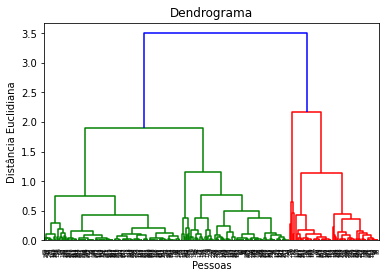

In [ ]:
dendrograma = dendrogram(linkage(data_heart, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(data_heart)

In [ ]:
print("Silhueta: " + str(metrics.silhouette_score(data_heart,previsoes)))

Silhueta: 0.5249780998254641
